<a href="https://colab.research.google.com/github/denpetrov/01_03_natural-language-processing-tensorflow/blob/master/w04_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers  # Figure out how to import regularizers
###

import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-18 13:01:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-18 13:01:59 (88.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))  # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences = True)))  # An LSTM Layer
model.add(Dropout(0.20))  # A dropout layer
model.add(LSTM(100))  # Another LSTM Layer
model.add(Dense(total_words / 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))  # A Dense Layer

adam = Adam(lr=0.01)  # Pick an optimizer

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  # Pick a loss function and an optimizer
print(model.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 300)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_21 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_22 (Dense)             (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
___________________________________________

In [17]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 43s 3ms/sample - loss: 6.8842 - acc: 0.0216
Epoch 2/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.5501 - acc: 0.0259
Epoch 3/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.4612 - acc: 0.0273
Epoch 4/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.4063 - acc: 0.0245
Epoch 5/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.3629 - acc: 0.0263
Epoch 6/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.3214 - acc: 0.0261
Epoch 7/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.2803 - acc: 0.0257
Epoch 8/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.2481 - acc: 0.0258
Epoch 9/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.2243 - acc: 0.0276
Epoch 10/100
15462/15462 [==============================] - 41s 3ms/sampl

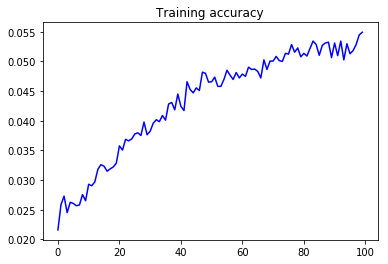

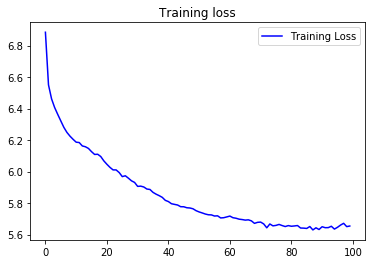

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope in the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to the world to
